# Notebook para estudo e explicação de polarização de transistores TBJ

Nesse notebook estudaremos a polarização do transistor bipolar de junção. Como exemplo utilizaremos o transistor para propósito geral QN2222a. O datasheet do transistor em questão (fabricado pela farchild) é encontrado em [link][link], outros datasheets (com as mesmas informações) podem ser encontrados facilmente em outros sites na internet (you can google it). O modelo SPICE do transistor também está no data sheet, e replicado logo abaixo:

.model Q2N2222 
NPN(Is = 14.34f Xti = 3 Eg = 1.11 Vaf = 74.03 Bf = 255.9 Ne = 1.307 Ise = 14.34 Ikf = .2847 Xtb = 1.5 Br = 6.092 Isc = 0 Ikr = 0 Rc = 1 Cjc = 7.306p Mjc = .3416 Vjc = .75 Fc = .5 Cje = 22.01p Mje = .377 Vje = .75 Tr = 46.91n Tf = 411.1p Itf = .6 Vtf = 1.7 Xtf = 3 Rb = 10)

In [1]:
import numpy as np # Carrega numpy para matemática computacional
import matplotlib.pyplot as plt # Carrega pyplot para plotar gráficos

In [2]:
k=1.38064852e-23
q=1.60217662e-19

In [3]:
def ctok(c):
    return c+273.15

In [4]:
def vt_val(temp):
    return k*ctok(temp)/q

In [5]:
vt_val(27)

0.02586491702007235

In [6]:
vt_val(77)

0.030173582190832365

___________
Para compreender o efeito da temperatura, primeiramente veja que, ao aumentar a temperatura o termo da função exponencial diminui, fazendo com que a função torne-se *mais lenta*. Portanto, assumindo valores mais baixos. Isso significa que para os mesmos valores de polarização do transistor, o aumento da temperatura faz com que a corrente de coletor diminua.

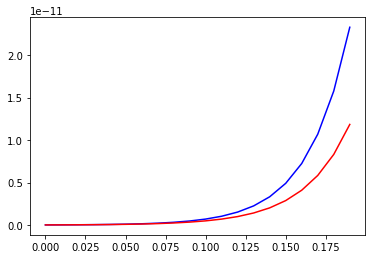

In [7]:
plt.figure(num=3)

x=np.arange(0, 20, dtype=float)/100

# plt.subplot(211)
plt.plot(x,14.3e-15*np.exp(x/vt_val(25)), color='blue')
# plt.subplot(212)
plt.plot(x,14.3e-15*np.exp(x/vt_val(55)), color='red')

## Exemplo 01

Suponha que o um transistor Q1 do tipo QN2222a está conectado ao circuito como mostrado na figura abaixo (apenas os parâmetros IS, Vaf e Bf são utilizados nos cálculos). Calcule a corrente de polarização Ic para Vdd=20V e Rc=500 Ohms.

In [8]:
#inicialização das variáveis utilizadas no problema.
IS=14.3e-15 # Corrente de saturação do transistor
VA=74.03    # Tensão de Early em polarização direta
Bf=255.9    # Beta em polarização direta

vdd=20      # Tensão Vdd de polarização do transistor
Rc=500      # Resistência de coletor

Queremos calcular a variação na corrente de coletor (Ic) para quando a temperatura muda em 10&deg;C. Além disso, devemos descobrir qual o valor da corrente Ib para ambas variações da corrente.

Assumindo um ponto de polarização vbe=0.72 V, devemos calcular a corrente coletor Ic. Nesse caso, como a tensão de Early foi mencionada no modelo do transistor, devemos utilizar a equação de corrente de coletor com o termo corretivo da tensão de Early (1+Vce/Va).

In [9]:
vbe1=0.72 # Inicia a tensão base-emissor em Vbe1=0.72V.
T1=27     # Inicia a temperatura_1 em 300.15 Kelvin (aproximadamente 27 celcius). Essa temperatura equivale à uma tensão termica de aproximadamente 25.864mV

# O próximo passo é o calculo da corrente de coletor Ic.
# Aqui utilizamos três iterações para reduzir os erros numéricos.
# O chute inicial da tensão VCE=VDD (iteração 0)
# as iterações 1 e 2 utilizam o valor da tensão vce calculado
# por vce=vdd-ic*Rc

#itr_0
ic=IS*np.exp(vbe1/vt_val(T1))*(1+vdd/VA)
vce=vdd-ic*Rc

#itr_1
ic=IS*np.exp(vbe1/vt_val(T1))*(1+vce/VA)
vce=vdd-ic*Rc

#itr_2
ic=IS*np.exp(vbe1/vt_val(T1))*(1+vce/VA)
vce=vdd-ic*Rc

# imprime os resultados em tela
print('Vbe:',vbe1)
print('Ic:',ic)
print('Vce:',vce,'\n')

#Calcula a corrente Ib utilizando Bf e imprime o resultado em tela
Ib=ic/Bf;
print('Ib=Ic/Bf:',Ib)

Vbe: 0.72
Ic: 0.019982348083627244
Vce: 10.008825958186378 

Ib=Ic/Bf: 7.808654976016899e-05


________
Uma maneira melhor de executar os cálculos é utilizando uma função. Definimos a função itr_problema que executa *itr* iterações dos cálculos de corrente de acordo com os parâmetros de entrada definidos para o problema em questão. Note que o equacionamento dessa função é exclusivo para esse exemplo e caso você queira utilizá-lo para calcular a corrente Ic de outro circuito será preciso corrigir as equações.

In [10]:
def itr_problema(IS, VA, BF, T, VCE, VBE, RC, VDD, itr):
    
# Os parâmetros de entrada da função são:
# IS - Corrente de saturação reversa
# VA - Tensão de Early em polarização direta
# BF - Beta em polarização direta
# T - Temperatura em Celcius
# VCE - Chute inicial para tensão VCE
# VBE - Tensão de polarização base-emissor
# RC - Resistência de coletor
# VDD - Tensão de polarização
# itr - Número de iterações

    vce=VCE
    for i in range(0,itr):
        ic=IS*np.exp(VBE/vt_val(T))*(1+vce/VA)
        vce=VDD-ic*RC
#         print(ic)

# A função retorna o valor de tensão Vce e corrente Ic para o transistor TBJ do circuito do exemplo.
    return vce,ic

___________
No item anterior calculamos (com três iterações) a corrente de coletor para temperatura de 27&deg;C. Agora queremos calcular a mesma corrente para uma temperatura de 37&deg;C. Agora podemos utilizar a função itr_problema() para executar esse cálculo (experimente inclusive aumentar a quantidade de iterações e veja a diferênça nas respostas).

In [12]:
# Executa a função itr_problema() com três iterações 
# e nas mesmas condições do exemplo anterior.
# as variáveis de retorno vv e ii são respectivamente
# tensão (Vce) e corrente de coletor (Ic).
# A temperatura utilizada para os cálculos é de 37 Centigrados
vv,ii=itr_problema(IS,VA,Bf,37,vdd,0.72,Rc,vdd,3)

# Imprime resultado em tela
print('Vbe:',0.72)
print('Ic:',ii)
print('Vce:',vv,'\n')

# Calcula corrente de base para resistor de base Rb
Ib=ii/Bf;
print('Ib=Ic/Bf:',Ib)

# Calcula tensão de polarização de base para resistor de base Rb (conectado em série à base do transistor)
Rb=10000
Vx=Ib*Rb+0.72
print('Vx:',Vx)

Vbe: 0.72
Ic: 0.008676916307981036
Vce: 15.66154184600948 

Ib=Ic/Bf: 3.390744942548275e-05


NameError: name 'VBE' is not defined

______
Note que apesar da mesma polarização (Vbe, Vdd e Rc) a corrente de coletor diminuiu devido ao efeito da temperatura. Uma variação de 10&deg;C (entre 27&deg;C e 37&deg;C) fez com que a corrente Ic variasse de 19.982mA para 8.676mA, e a tensão Vce variasse de 10.008V para 15.661V. O que aproxima o transistor da região de corte.

Nesse mesmo caso, se quisermos manter o mesmo valor de corrente Ic no transistor, é preciso que a tensão de Vbe aumente de 2mV/&deg;C. Por exemplo, quando a temperatura aumenta de 27&deg;C, para 30&deg;C, a tensão Vbe deve ser aumentada de 6mV (de 0.72V para 0.726V):

In [45]:
vv,ii=itr_problema(IS,VA,Bf,30,vdd,0.726,Rc,vdd,3)

# Imprime resultado em tela
print('Vbe:',0.726)
print('Ic:',ii)
print('Vce:',vv,'\n')


Vbe: 0.726
Ic: 0.019174801371896404
Vce: 10.412599314051798 



# Exemplo 02

Suponha que circuito da figura anterior é um componente de um sistema que será utilizado nas cidades de João Pessoa (Brasil) e Canberra (Austrália). A temperatura média (méd, máx e min) anual dessas duas cidades pode ser encontrada nos endereços abaixo:

* https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature
* João Pessoa - JPA (1961-1990):
  * http://www.inmet.gov.br/webcdp/climatologia/normais/imagens/normais
* Canberra - CBR (1939-2010):
  * http://www.bom.gov.au/climate/averages/tables/cw_070014_All.shtml

Mostre a variação da corrente de coletor Ic para o circuito nas duas cidades (e que utilizam a mesma polarização).

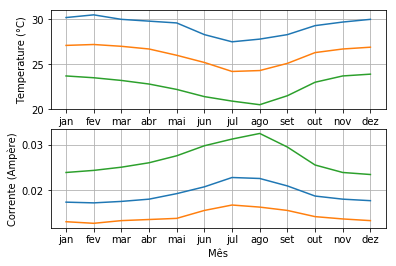

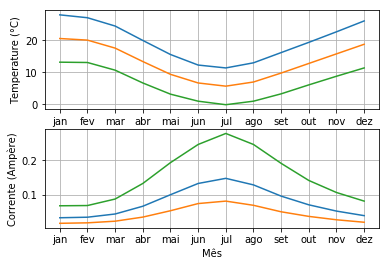

In [14]:
mes=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']

Tc_jpa=[27.1,27.2,27.0,26.7,26.0,25.2,24.2,24.3,25.1,26.3,26.7,26.9]
Tc_jpa_max=[30.2,30.5,30.0,29.8,29.6,28.3,27.5,27.8,28.3,29.3,29.7,30.0]
Tc_jpa_min=[23.7,23.5,23.2,22.8,22.2,21.4,20.9,20.5,21.5,23.0,23.7,23.9]

ic_jpa=[IS*np.exp(vbe1/vt_val(x)) for x in Tc_jpa]
ic_jpa_max=[IS*np.exp(vbe1/vt_val(x)) for x in Tc_jpa_max]
ic_jpa_min=[IS*np.exp(vbe1/vt_val(x)) for x in Tc_jpa_min]

# plt.figure(num=1, figsize=(15,10))
plt.figure(num=1)

plt.subplot(211)
plt.grid(True)
plt.xlabel('Mês')
plt.ylabel('Temperature (\xb0C)')
plt.plot(mes,Tc_jpa_max,mes,Tc_jpa,mes,Tc_jpa_min)

plt.subplot(212)
plt.grid(True)
plt.xlabel('Mês')
plt.ylabel('Corrente (Ampère)')
plt.plot(mes,ic_jpa,mes,ic_jpa_max,mes,ic_jpa_min)

Tc_cbr=[20.6,20.1,17.6,13.4,9.4,6.7,5.7,7.0,9.8,12.8,15.8,18.8]
Tc_cbr_max=[28.0,27.1,24.5,20.0,15.6,12.3,11.4,13.0,16.2,19.4,22.7,26.1]
Tc_cbr_min=[13.2,13.1,10.7,6.7,3.2,1.0,-0.1,1.0,3.3,6.1,8.8,11.4]

ic_cbr=[IS*np.exp(vbe1/vt_val(x)) for x in Tc_cbr]
ic_cbr_max=[IS*np.exp(vbe1/vt_val(x)) for x in Tc_cbr_max]
ic_cbr_min=[IS*np.exp(vbe1/vt_val(x)) for x in Tc_cbr_min]

# plt.figure(num=2, figsize=(15,10))
plt.figure(num=2)

plt.subplot(211)
plt.grid(True)
plt.xlabel('Mês')
plt.ylabel('Temperature (\xb0C)')
plt.plot(mes,Tc_cbr_max,mes,Tc_cbr,mes,Tc_cbr_min)

plt.subplot(212)
plt.grid(True)
plt.xlabel('Mês')
plt.ylabel('Corrente (Ampère)')
plt.plot(mes,ic_cbr,mes,ic_cbr_max,mes,ic_cbr_min)

In [15]:
print('Mínima Corrente em JPA:', np.min(ic_jpa), '@', np.min(Tc_jpa), '\xb0C')
print('Máxima Corrente em JPA:', np.max(ic_jpa), '@', np.max(Tc_jpa), '\xb0C\n')

print('Mínima Corrente em CBR:', np.min(ic_cbr), '@', np.min(Tc_cbr), '\xb0C')
print('Máxima Corrente em CBR:', np.max(ic_cbr), '@', np.max(Tc_cbr), '\xb0C')

Mínima Corrente em JPA: 0.01724697135727302 @ 24.2 °C
Máxima Corrente em JPA: 0.02283512058339636 @ 27.2 °C

Mínima Corrente em CBR: 0.03222242669567011 @ 5.7 °C
Máxima Corrente em CBR: 0.14730442913352457 @ 20.6 °C
